### Question 1(a)
Simulate a Bernoulli(0.2) RV (a biased coin) tossed 20 times. Plot the outcomes against the trial number.


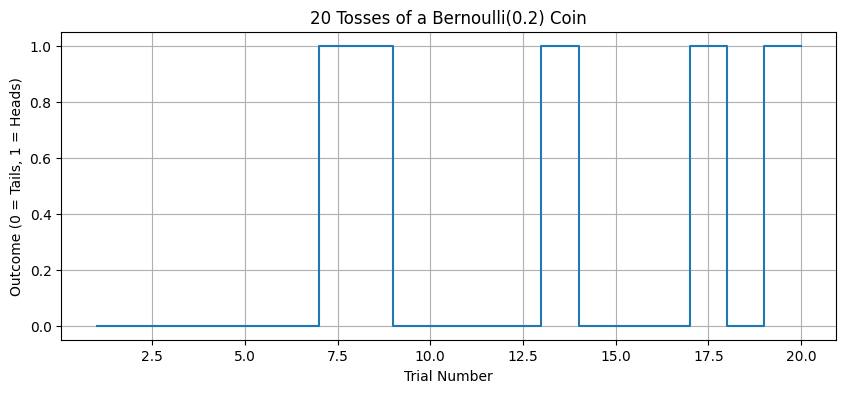

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
p = 0.2
n_trials = 20
outcomes = np.random.binomial(1, p, n_trials)

plt.figure(figsize=(10, 4))
plt.step(range(1, n_trials + 1), outcomes, where='pre')
plt.title('20 Tosses of a Bernoulli(0.2) Coin')
plt.xlabel('Trial Number')
plt.ylabel('Outcome (0 = Tails, 1 = Heads)')
plt.grid(True)
plt.show()


**Observation:**  
The plot displays a sequence of 0s and 1s representing the outcomes of coin tosses, where 0 indicates tails and 1 indicates heads. Given that the coin is biased with a probability of 0.2 for landing heads, the majority of the results are tails (0), with relatively fewer instances of heads (1) appearing throughout the sequence.


### Question 1(b)
Repeat the above simulation 5 times and plot all outcomes on a single figure against trial number.


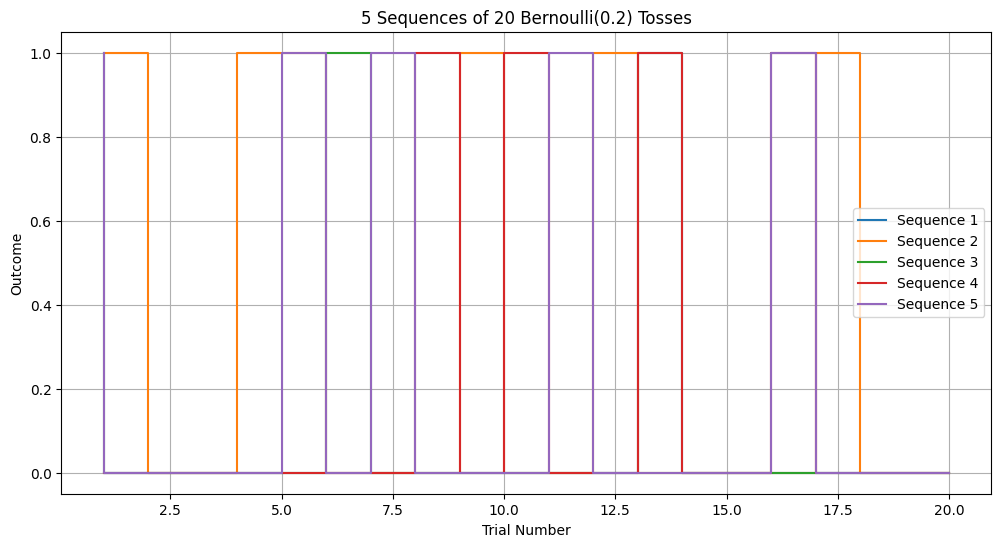

In [2]:
np.random.seed(1)
num_repeats = 5
outcomes_matrix = np.random.binomial(1, p, (num_repeats, n_trials))

plt.figure(figsize=(12, 6))
for i in range(num_repeats):
    plt.step(range(1, n_trials + 1), outcomes_matrix[i], where='pre', label=f'Sequence {i+1}')
    
plt.title('5 Sequences of 20 Bernoulli(0.2) Tosses')
plt.xlabel('Trial Number')
plt.ylabel('Outcome')
plt.legend()
plt.grid(True)
plt.show()


**Observation:**  
Each line in the plot represents a distinct sequence of 20 coin tosses. Although there is noticeable variability between the sequences, they all consistently reflect the underlying bias of the coin. Due to the low probability of heads (0.2), each sequence tends to contain significantly more 0s (tails) than 1s (heads), as expected.


### Question 1(c)
Repeat the 20-toss simulation 100 times and store them in an array. For each sequence, calculate the total number of 1s (heads) and plot a histogram.  
Which PMF does the histogram approximate?


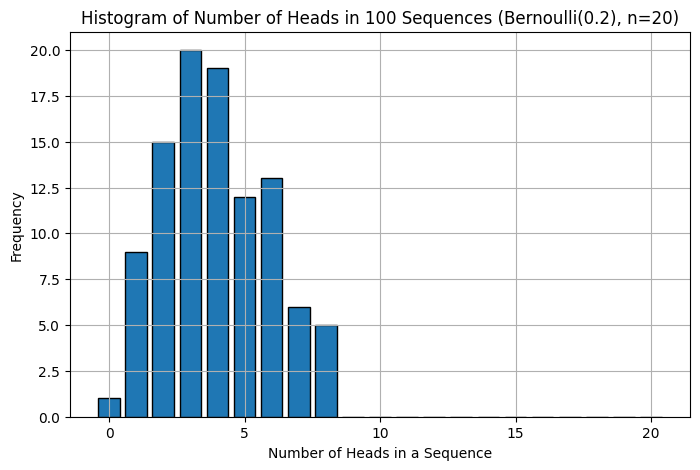

In [3]:
np.random.seed(2)
num_sequences = 100
sequences = np.random.binomial(1, p, (num_sequences, n_trials))
sums = sequences.sum(axis=1)

plt.figure(figsize=(8, 5))
plt.hist(sums, bins=range(0, n_trials + 2), align='left', rwidth=0.8, edgecolor='black')
plt.title('Histogram of Number of Heads in 100 Sequences (Bernoulli(0.2), n=20)')
plt.xlabel('Number of Heads in a Sequence')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Observation:**  
The histogram provides an approximate visualization of a Binomial(20, 0.2) distribution, based on multiple sequences of coin tosses. It shows the number of heads observed in each 20-toss sequence. As expected, the most frequent outcomes are around the theoretical mean of 4 heads (calculated as 20 × 0.2), demonstrating the expected central tendency.


### Question 1(d)
Starting with the array obtained in (c), choose all sequences that sum to at least 3 heads.  
For these sequences, plot a histogram of the total number of heads.  
Which PMF does the histogram approximate?


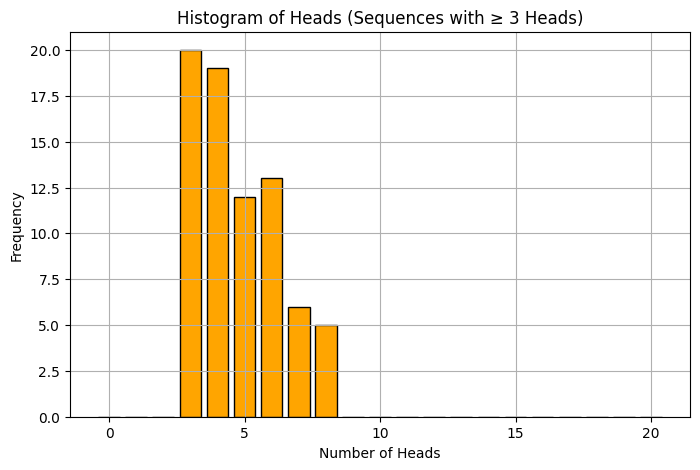

In [4]:
filtered_sums = sums[sums >= 3]

plt.figure(figsize=(8, 5))
plt.hist(filtered_sums, bins=range(0, n_trials + 2), align='left', rwidth=0.8, edgecolor='black', color='orange')
plt.title('Histogram of Heads (Sequences with ≥ 3 Heads)')
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Observation:**  
The filtered histogram continues to resemble the shape of a Binomial(20, 0.2) distribution, but it now represents a conditional distribution under the constraint that each sequence contains at least 3 heads. As a result, lower values (fewer than 3 heads) are excluded, slightly shifting the distribution and altering its appearance while still reflecting the original binomial characteristics.


## Question 2  
Pick four values of alpha uniformly and randomly from the interval (0,100).  
For each alpha, simulate a Binomial(n,p) RV, with (n) chosen as small as possible such that the histogram approximates the PMF of a Poisson(alpha) distribution.  
Also, simulate the corresponding Poisson(alpha) RVs and compare the histograms.


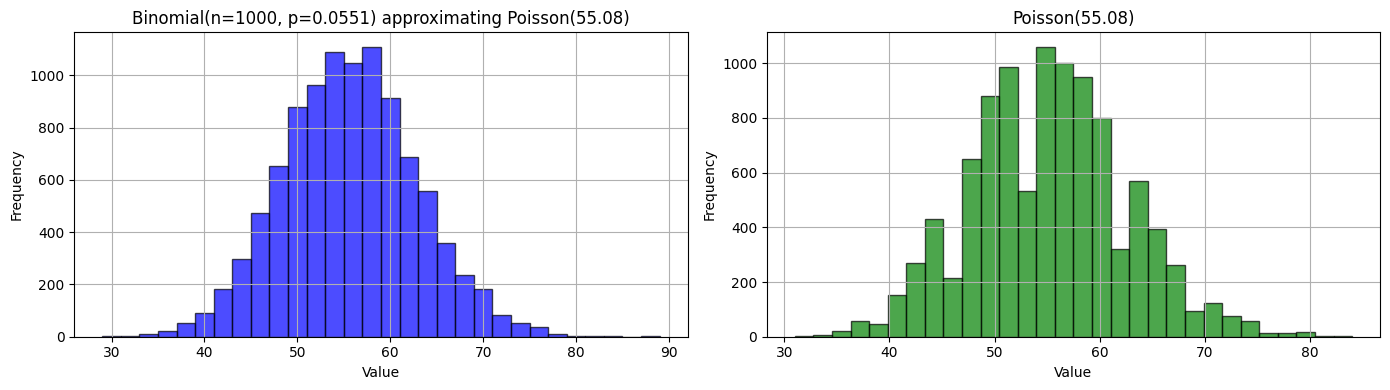

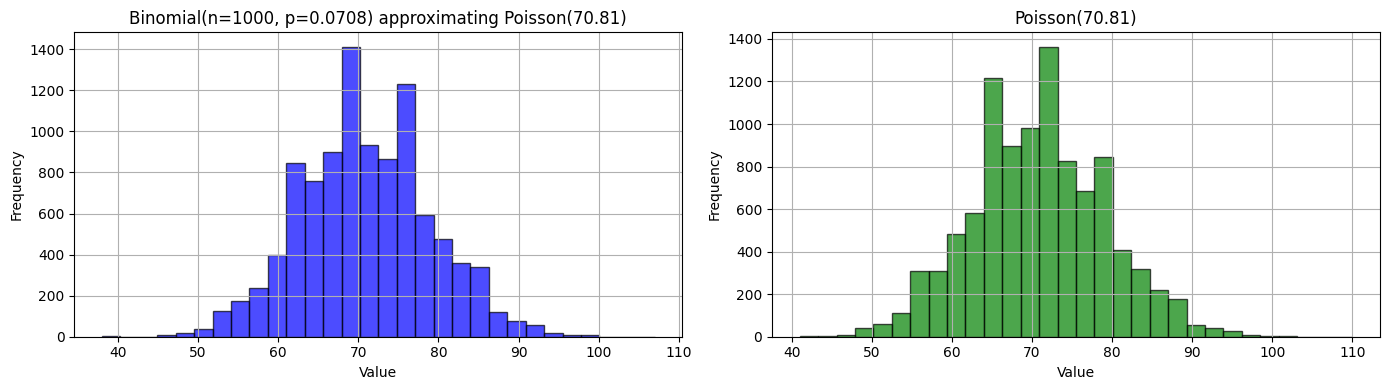

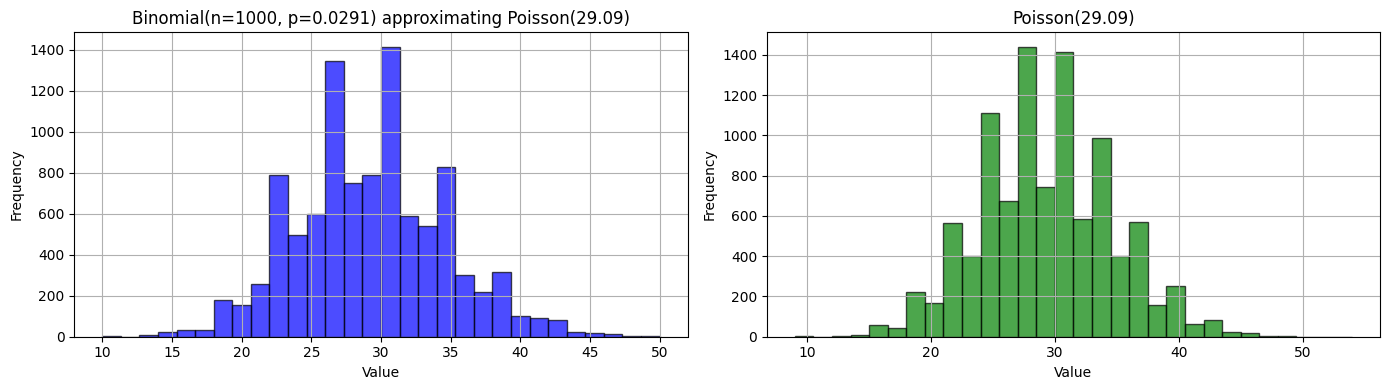

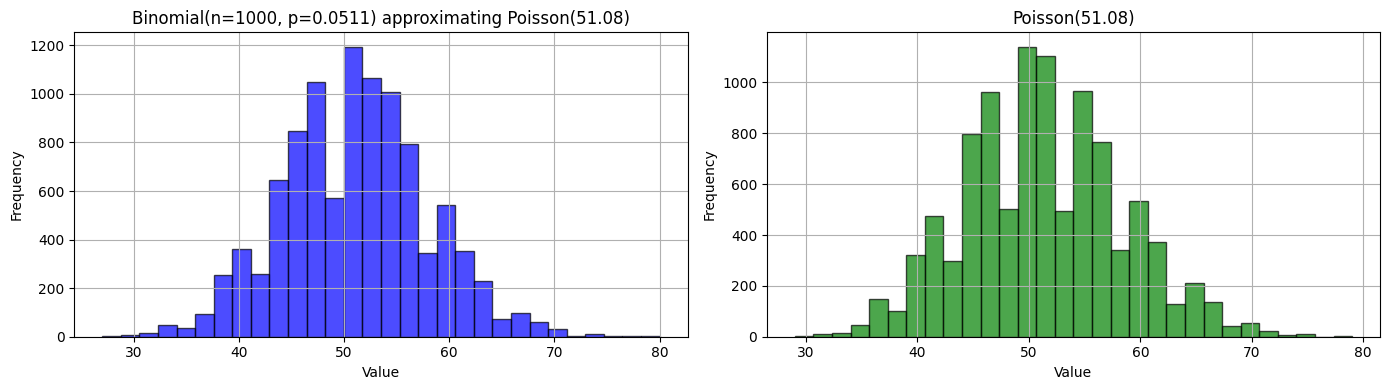

In [5]:
np.random.seed(3)
experiments = 10000
n_val = 1000
alphas = np.random.uniform(0, 100, 4)

for alpha in alphas:
    n = n_val
    p_val = alpha / n
    binom_samples = np.random.binomial(n, p_val, experiments)
    poisson_samples = np.random.poisson(alpha, experiments)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    axes[0].hist(binom_samples, bins=30, color='blue', edgecolor='black', alpha=0.7)
    axes[0].set_title(f'Binomial(n={n}, p={p_val:.4f}) approximating Poisson({alpha:.2f})')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(True)
    
    axes[1].hist(poisson_samples, bins=30, color='green', edgecolor='black', alpha=0.7)
    axes[1].set_title(f'Poisson({alpha:.2f})')
    axes[1].set_xlabel('Value')
    axes[1].set_ylabel('Frequency')
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()


**Observation:**  
For each selected alpha, the histogram produced from the Binomial simulation, where the probability p equals alpha divided by n, and n is sufficiently large, closely matches the histogram from the Poisson alpha simulation. This result confirms the Binomial-to-Poisson approximation. Under these conditions, when n becomes large and p becomes small, both distributions converge, demonstrating their equivalence. The approximation highlights that, as the number of trials increases and the probability of success decreases, the Binomial distribution starts to resemble the Poisson distribution. This convergence reinforces the relationship between the two distributions in such scenarios and validates the approximation as a useful tool for modeling rare events.


## Question 3  
Illustrate the Law of Large Numbers (LLN) and the Central Limit Theorem (CLT) for the sum of independent and identically distributed Poisson(\(\alpha\)) RVs.  
Choose two values of \(\alpha\) uniformly at random from the interval (1,20).  
For each \(\alpha\), demonstrate the effect over an increasing sequence of the number of RVs being added.


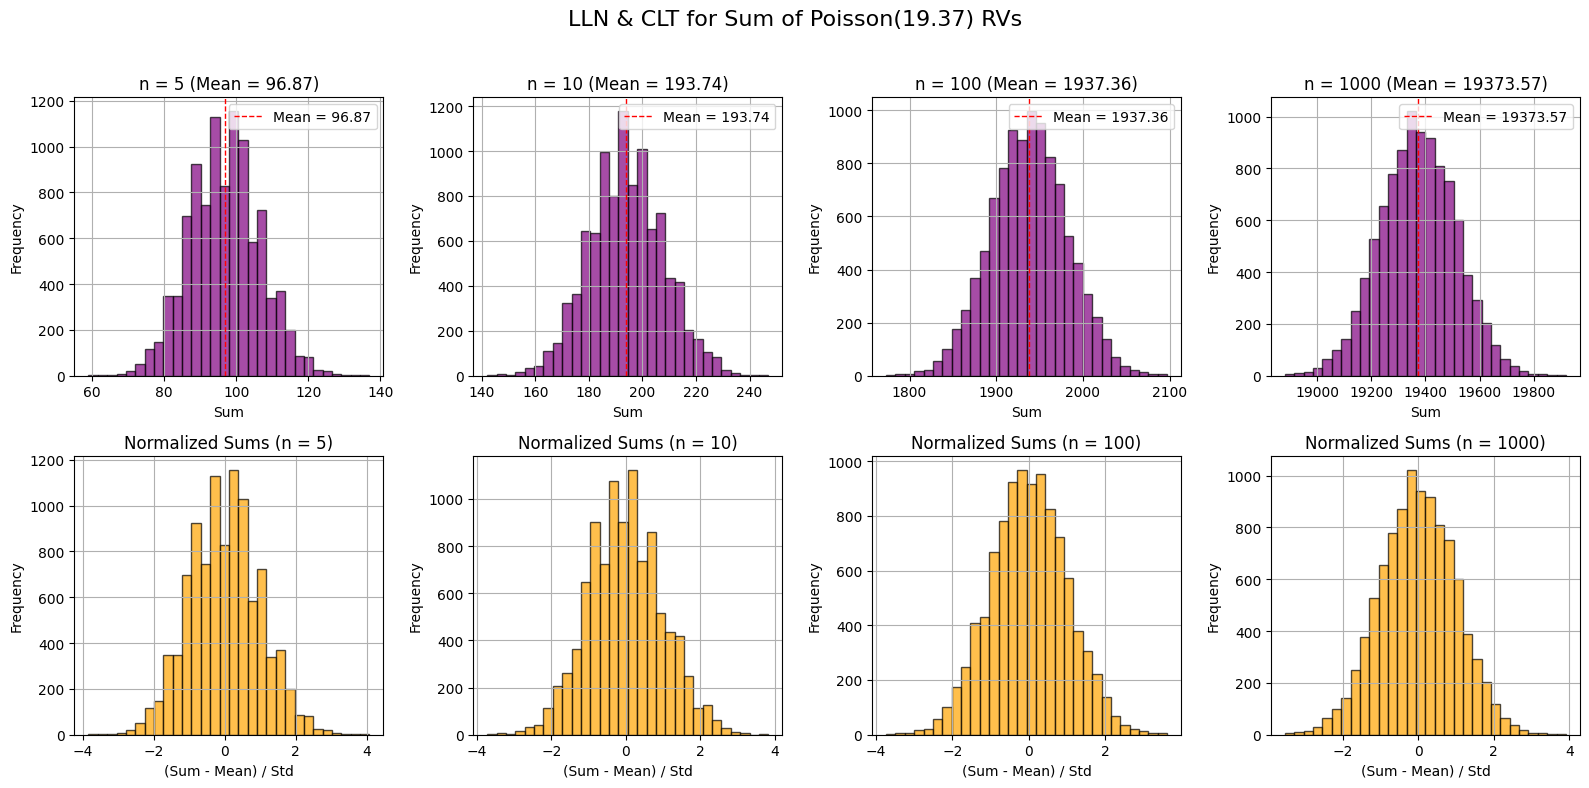

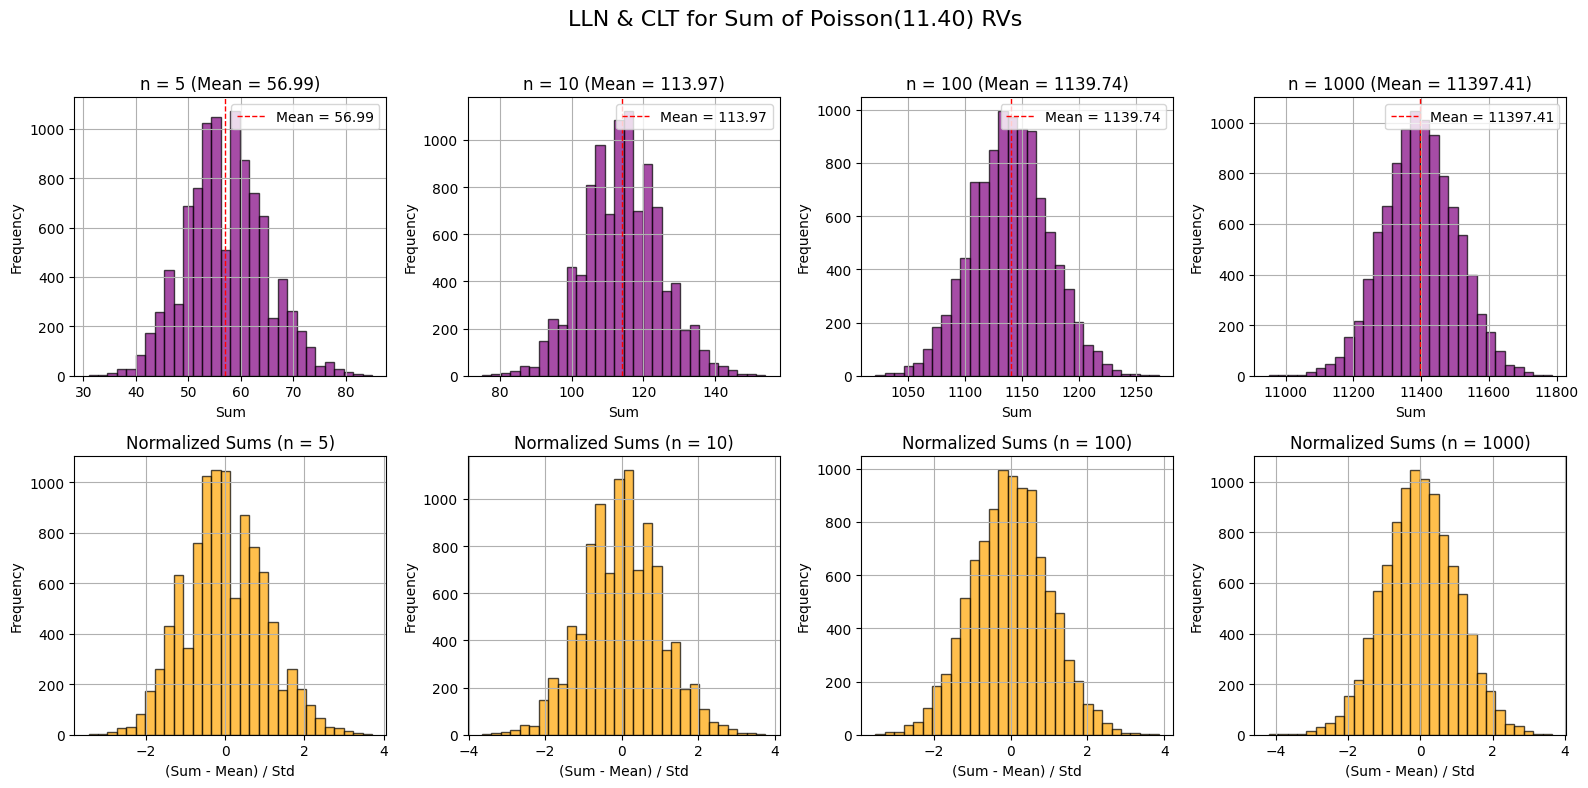

In [6]:
np.random.seed(4)
alphas_lln = np.random.uniform(1, 20, 2)
n_values = [5, 10, 100, 1000]
experiments = 10000

for alpha in alphas_lln:
    fig, axes = plt.subplots(2, len(n_values), figsize=(4*len(n_values), 8))
    fig.suptitle(f'LLN & CLT for Sum of Poisson({alpha:.2f}) RVs', fontsize=16)
    
    for i, n in enumerate(n_values):
        samples = np.random.poisson(alpha, (experiments, n))
        sums_samples = samples.sum(axis=1)
        mean_sum = n * alpha
        axes[0, i].hist(sums_samples, bins=30, color='purple', edgecolor='black', alpha=0.7)
        axes[0, i].axvline(mean_sum, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean_sum:.2f}')
        axes[0, i].set_title(f'n = {n} (Mean = {mean_sum:.2f})')
        axes[0, i].set_xlabel('Sum')
        axes[0, i].set_ylabel('Frequency')
        axes[0, i].legend()
        axes[0, i].grid(True)
        std_sum = np.sqrt(n * alpha)
        normalized_sums = (sums_samples - mean_sum) / std_sum
        axes[1, i].hist(normalized_sums, bins=30, color='orange', edgecolor='black', alpha=0.7)
        axes[1, i].set_title(f'Normalized Sums (n = {n})')
        axes[1, i].set_xlabel('(Sum - Mean) / Std')
        axes[1, i].set_ylabel('Frequency')
        axes[1, i].grid(True)
        
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


**Observation:**  
In the top row (LLN), as the number of random variables (RVs) increases, the distribution of their sum begins to increasingly cluster around the expected value \(n\alpha\), which demonstrates the Law of Large Numbers (LLN). According to LLN, as the sample size grows, the average of the random variables converges to the expected value, regardless of the individual distribution of the RVs. In the bottom row (CLT), after normalizing the sum by subtracting the mean and dividing by the standard deviation, the distribution takes the shape of a bell curve. This bell-shaped curve becomes increasingly similar to the standard normal distribution, as predicted by the Central Limit Theorem (CLT). The CLT asserts that, for sufficiently large sample sizes, the sum of independent random variables, when properly normalized, will approximate a normal distribution, regardless of the original distribution of the variables.
